## Predict Stock Prices Using Machine Learning and Python

https://www.youtube.com/watch?v=hOLSGMEEwlI

In [42]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [43]:
one_day = dt.timedelta(1)
sixty_one_days = dt.timedelta(61)
date = pd.to_datetime('today')

start = date - sixty_one_days
end = date - one_day

# Remote Data Error
# I don't know why
# df = web.DataReader('NFLX', 'yahoo', start=start, end=end)
df = yf.download(tickers='NFLX', interval='1d', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [44]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,512.650024,518.950012,505.200012,509.109985,509.109985,4091900
2021-05-04,510.779999,511.630005,496.790009,503.179993,503.179993,4349500
2021-05-05,504.989990,507.779999,494.630005,496.079987,496.079987,3129400
2021-05-06,495.989990,499.549988,491.369995,499.549988,499.549988,3783700
2021-05-07,504.619995,508.549988,501.119995,503.839996,503.839996,3132800


In [45]:
df.shape

(42, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

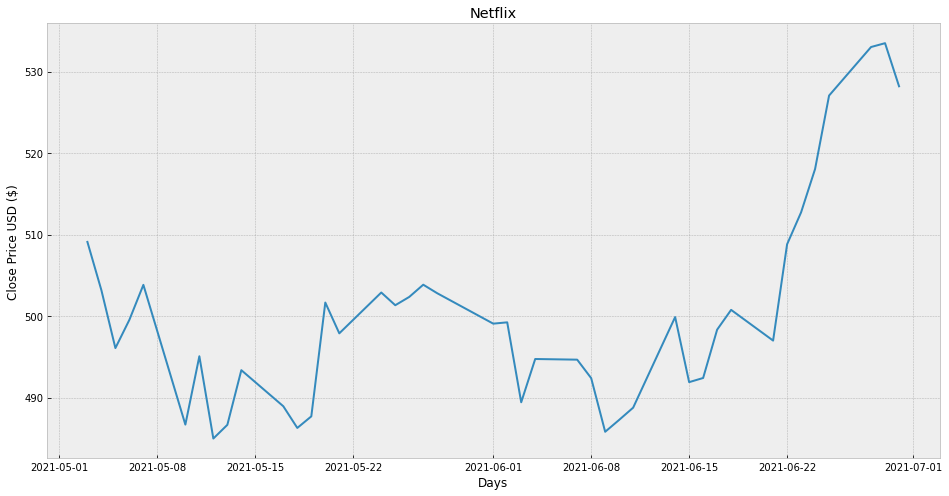

In [46]:
# Visualize close price
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,512.650024,518.950012,505.200012,509.109985,509.109985,4091900
2021-05-04,510.779999,511.630005,496.790009,503.179993,503.179993,4349500
2021-05-05,504.989990,507.779999,494.630005,496.079987,496.079987,3129400
2021-05-06,495.989990,499.549988,491.369995,499.549988,499.549988,3783700
2021-05-07,504.619995,508.549988,501.119995,503.839996,503.839996,3132800


In [70]:
df = pd.DataFrame(df['Close'])

In [71]:
df.head()

,Close
Date,
2021-05-03,509.109985
2021-05-04,503.179993
2021-05-05,496.079987
2021-05-06,499.549988
2021-05-07,503.839996


In [72]:
df.shape

(42, 1)

In [73]:
# Create a variable to predict 'x' days out into the future
future_days = 25

# Create a new column (target) shifted 'x' days/units up
df['Prediction'] = df[['Close']].shift(-future_days)

In [77]:
df.tail()

,Close,Prediction
Date,,
2021-06-24,518.059998,NaN
2021-06-25,527.070007,NaN
2021-06-28,533.030029,NaN
2021-06-29,533.500000,NaN
2021-06-30,528.210022,NaN


In [75]:
df_close.shape

(42, 1)

In [78]:
# Create feature data set (X) and convert it to numpy array and remove last 'x' days/rows
X = np.array(df.drop(['Prediction'], 1))[:-future_days]

In [79]:
X

array([[509.10998535],
       [503.17999268],
       [496.07998657],
       [499.54998779],
       [503.83999634],
       [486.69000244],
       [495.07998657],
       [484.98001099],
       [486.66000366],
       [493.36999512],
       [488.94000244],
       [486.27999878],
       [487.70001221],
       [501.67001343],
       [497.89001465],
       [502.8999939 ],
       [501.33999634]])

In [80]:
# Create the target data set (y) and convert it to a numpy array to get all the target values except the last 'x' days/rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[492.39001465 485.80999756 487.26998901 488.76998901 499.89001465
 491.8999939  492.41000366 498.33999634 500.76998901 497.
 508.82000732 512.73999023 518.05999756 527.07000732 533.0300293
 533.5        528.21002197]


In [81]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [85]:
# Create the models
# Create the Decision Tree Regressor Model
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [83]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[509.10998535],
       [503.17999268],
       [496.07998657],
       [499.54998779],
       [503.83999634],
       [486.69000244],
       [495.07998657],
       [484.98001099],
       [486.66000366],
       [493.36999512],
       [488.94000244],
       [486.27999878],
       [487.70001221],
       [501.67001343],
       [497.89001465],
       [502.8999939 ],
       [501.33999634]])

In [86]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[499.89001465 533.5        487.26998901 533.0300293  499.89001465
 491.8999939  492.41000366 512.73999023 500.76998901 497.
 508.82000732 512.73999023 518.05999756 528.21002197 533.0300293
 533.5        528.21002197]

[521.45973231 516.45986361 510.47349901 513.39922783 517.01634518
 502.55634122 509.63034979 501.11456326 502.53104777 508.18857183
 504.45342696 502.21064695 503.40793016 515.18672579 511.99962277
 516.22378286 514.90847213]
